In [1]:
import time
import cifar10
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras import datasets
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
start = time.time()
data = datasets.cifar10.load_data()
train, test = data

In [3]:
x_train_image , y_train = train
x_test_image, y_test = test
x_train_image.shape, y_train.shape, x_test_image.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
#reshape data
x_train = x_train_image.reshape(50000, 32*32*3)
x_test = x_test_image.reshape(10000, 32*32*3)
y_train = y_train.reshape(50000)
y_test = y_test.reshape(10000)


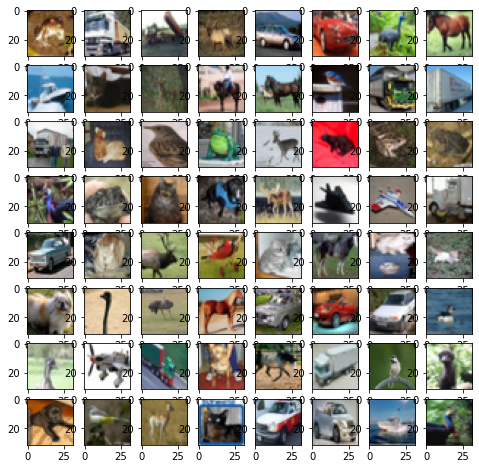

In [5]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_train_image[i])
plt.show()

In [6]:
pca = PCA()
pca.fit(x_train)

PCA()

In [7]:
k = 0
curr = 0
total = sum(pca.explained_variance_)
while curr/total < .99:
    curr += pca.explained_variance_[k]
    k+=1
k

658

In [8]:
pca = PCA(n_components = k)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
x_test_pca.shape, x_train_pca.shape

((10000, 658), (50000, 658))

In [9]:
model1 = svm.SVC()
model1.fit(x_train_pca, y_train)
y_pred1 = model1.predict(x_test_pca)
score1 = model1.score(x_test_pca, y_test)
score1

0.5439

In [10]:
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.61      0.62      0.62      1000
           1       0.64      0.65      0.64      1000
           2       0.42      0.41      0.41      1000
           3       0.38      0.38      0.38      1000
           4       0.47      0.44      0.45      1000
           5       0.49      0.43      0.46      1000
           6       0.53      0.64      0.58      1000
           7       0.63      0.57      0.60      1000
           8       0.65      0.69      0.67      1000
           9       0.59      0.62      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000

[[621  25  59  17  22  13  20  26 141  56]
 [ 33 646  22  41   9  17  16  20  48 148]
 [ 85  23 407  88 133  65 110  50  24  15]
 [ 32  30  93 384  56 165 123  41  25  51]
 [ 48  14 159  66 436  41 129  69  22  16]
 [ 21  13  86 197  70 434 

In [11]:
model2 = RandomForestClassifier()
model2.fit(x_train_pca, y_train)
y_pred2 = model2.predict(x_test_pca)
score2 = model2.score(x_test_pca, y_test)
score2

0.3898

In [12]:
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.44      0.47      0.46      1000
           1       0.39      0.50      0.44      1000
           2       0.30      0.27      0.28      1000
           3       0.27      0.26      0.26      1000
           4       0.36      0.37      0.37      1000
           5       0.34      0.31      0.32      1000
           6       0.43      0.45      0.44      1000
           7       0.44      0.34      0.38      1000
           8       0.49      0.55      0.52      1000
           9       0.41      0.40      0.40      1000

    accuracy                           0.39     10000
   macro avg       0.39      0.39      0.39     10000
weighted avg       0.39      0.39      0.39     10000

[[473  64  60  47  26  25  32  41 175  57]
 [ 51 502  28  45  16  37  38  36  69 178]
 [116  54 265  96 175  69  95  55  43  32]
 [ 65  74  94 255  81 168  95  62  49  57]
 [ 58  33 153  80 371  50 125  52  44  34]
 [ 41  55  98 180  80 306 

In [13]:
model3 = LinearRegression()
model3.fit(x_train_pca, y_train)
y_pred3 = model3.predict(x_test_pca)
score3 = model3.score(x_test_pca, y_test)
score3

0.0764517349881364

In [14]:
def change(i):
    classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    return classes[i]

In [15]:
score = max(score1, score2, score3)
if score == score1:
    print(1)
    y_pred = y_pred1
elif score == score3:
    print(3)
    y_pred = y_pred3
else:
    print(2)
    y_pred = y_pred2

1


In [16]:
df = pd.DataFrame(y_pred, columns = ["pred"])
df["pred"] = df["pred"].apply(change)

In [17]:
df.head(5)
end = time.time()

In [18]:
print(end - start)

8200.344917297363
